In [ ]:
# 1. Cloud-and-Weather-Pattern-Detection-in-Atmosphere-of-Venus

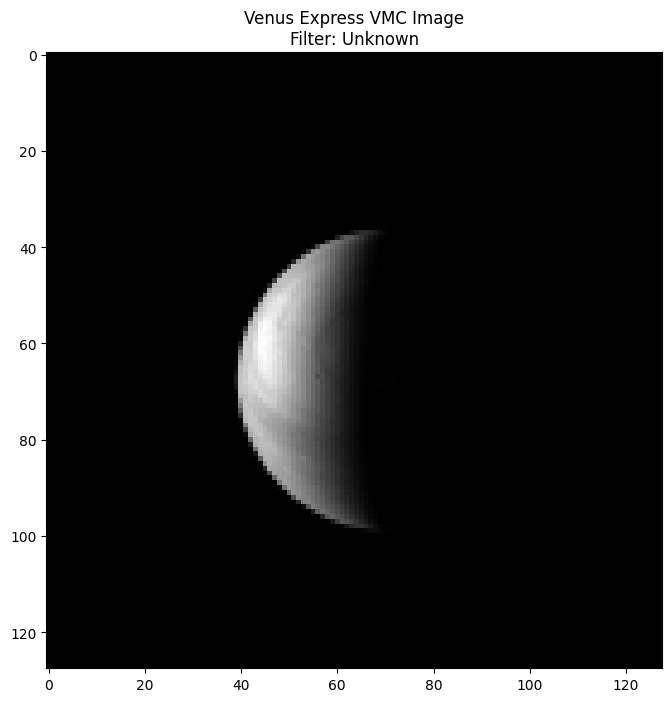


Metadata:
product_id: V0557_0000_UV2.IMG


In [3]:
run read_lbl_jpg_files.py

In [4]:
#We want to: 
#1. Download the raw data
#2. Organise the raw data by orbits
#3. Filtered dataset of just UV2 images (since these are likely most useful to study clouds)
#4. Preprocessed images with contrast enhancement and noise reduction

In [ ]:
from vmc_downloader import VenusExpressDownloader, list_downloaded_files

# Initialize with your data directory
downloader = VenusExpressDownloader(base_output_dir="/Users/n_welikala/cvprojects/venus/data/vmc/raw")

# Test parameters - very small sample
orbits_to_download = 10  # just 2 orbits
max_pairs_per_orbit = 10  # just 3 pairs per orbit

# Get orbit directories
directories = downloader.get_orbit_directories()
print(f"Found {len(directories)} orbit directories")

# Download data
for directory in directories[:orbits_to_download]:
    print(f"\nProcessing orbit directory: {directory}")
    pairs_downloaded = downloader.download_orbit_data(directory, max_pairs_per_orbit)
    print(f"Successfully downloaded {pairs_downloaded} pairs from orbit {directory}")

# Check what was downloaded
list_downloaded_files("/Users/n_welikala/cvprojects/venus/data/vmc/raw")

In [ ]:
from vmc_catalog import catalog_images

# Analyze the image catalog
catalog_images("/Users/n_welikala/cvprojects/venus/data/vmc/raw")

In [ ]:
# We will select just the UV2 images since these are most useful for the project. We will create a script to extract and organizs just the images.

In [ ]:
from vmc_uv2_extract import extract_uv2_images

# Extract UV2 images
raw_dir = "/Users/n_welikala/cvprojects/venus/data/vmc/raw"
base_dir = "/Users/n_welikala/cvprojects/venus/data/vmc"
extract_uv2_images(raw_dir, base_dir)

In [ ]:
import os

def check_directory_structure(base_dir):
    """Print out the directory structure under vmc/filtered/uv2"""
    filtered_dir = os.path.join(base_dir, 'filtered', 'uv2')
    print(f"Directory structure under {filtered_dir}:")
    print("-" * 50)
    
    # Walk through the directory
    for root, dirs, files in os.walk(filtered_dir):
        level = root.replace(base_dir, '').count(os.sep)
        indent = ' ' * 4 * level
        print(f"{indent}{os.path.basename(root)}/")
        subindent = ' ' * 4 * (level + 1)
        for f in sorted(files):
            print(f"{subindent}{f}")

# Check the structure
base_dir = "/Users/n_welikala/cvprojects/venus/data/vmc"
check_directory_structure(base_dir)

In [ ]:
# Do basic pre-processing steps:
# Contrast stretching (to enhance visibility of cloud features)
# Gaussian denoising (to reduce image noise)
# Normalization (to standardize pixel values)

Processing V0555_0005_UV2.JPG
Processing V0555_0006_UV2.JPG
Processing V0555_0001_UV2.JPG
Processing V0555_0000_UV2.JPG
Processing V0552_0000_UV2.JPG
Processing V0553_0005_UV2.JPG
Processing V0553_0000_UV2.JPG
Processing V0553_0001_UV2.JPG
Processing V0554_0000_UV2.JPG
Processing V0551_0001_UV2.JPG
Processing V0551_0000_UV2.JPG
Processing V0551_0006_UV2.JPG
Processing V0551_0005_UV2.JPG
Processing V0556_0001_UV2.JPG
Processing V0556_0000_UV2.JPG
Processing V0556_0006_UV2.JPG
Processing V0556_0005_UV2.JPG
Processing V0558_0006_UV2.JPG
Processing V0558_0005_UV2.JPG
Processing V0558_0000_UV2.JPG
Processing V0558_0001_UV2.JPG
Processing V0559_0006_UV2.JPG
Processing V0559_0005_UV2.JPG
Processing V0559_0001_UV2.JPG
Processing V0559_0000_UV2.JPG
Processing V0557_0000_UV2.JPG
Processing V0557_0001_UV2.JPG
Processing V0557_0006_UV2.JPG
Processing V0557_0005_UV2.JPG
Processing V0550_0000_UV2.JPG
Processing V0550_0001_UV2.JPG
Processing V0550_0006_UV2.JPG
Processing V0550_0005_UV2.JPG


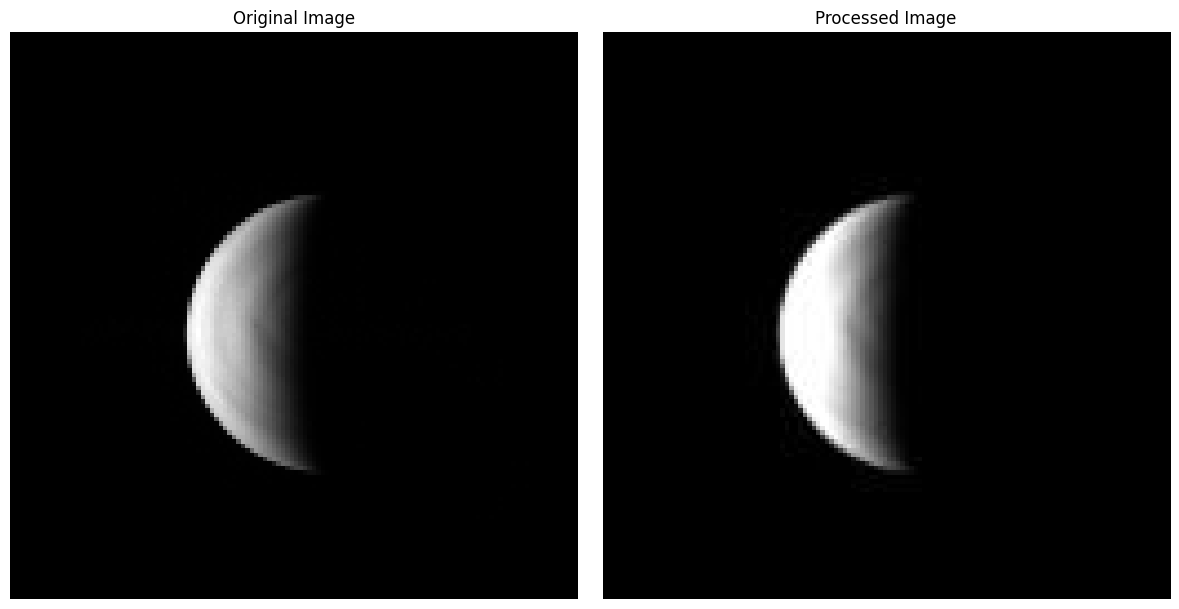

In [2]:
from vmc_processor import VMCImageProcessor

# Set up directories
filtered_dir = "/Users/n_welikala/cvprojects/venus/data/vmc/filtered/uv2"
processed_dir = "/Users/n_welikala/cvprojects/venus/data/vmc/processed/uv2"

# Create processor and run
processor = VMCImageProcessor(filtered_dir, processed_dir)
processor.process_all_images()

# Show a comparison for one image
processor.show_comparison('0550', 0)

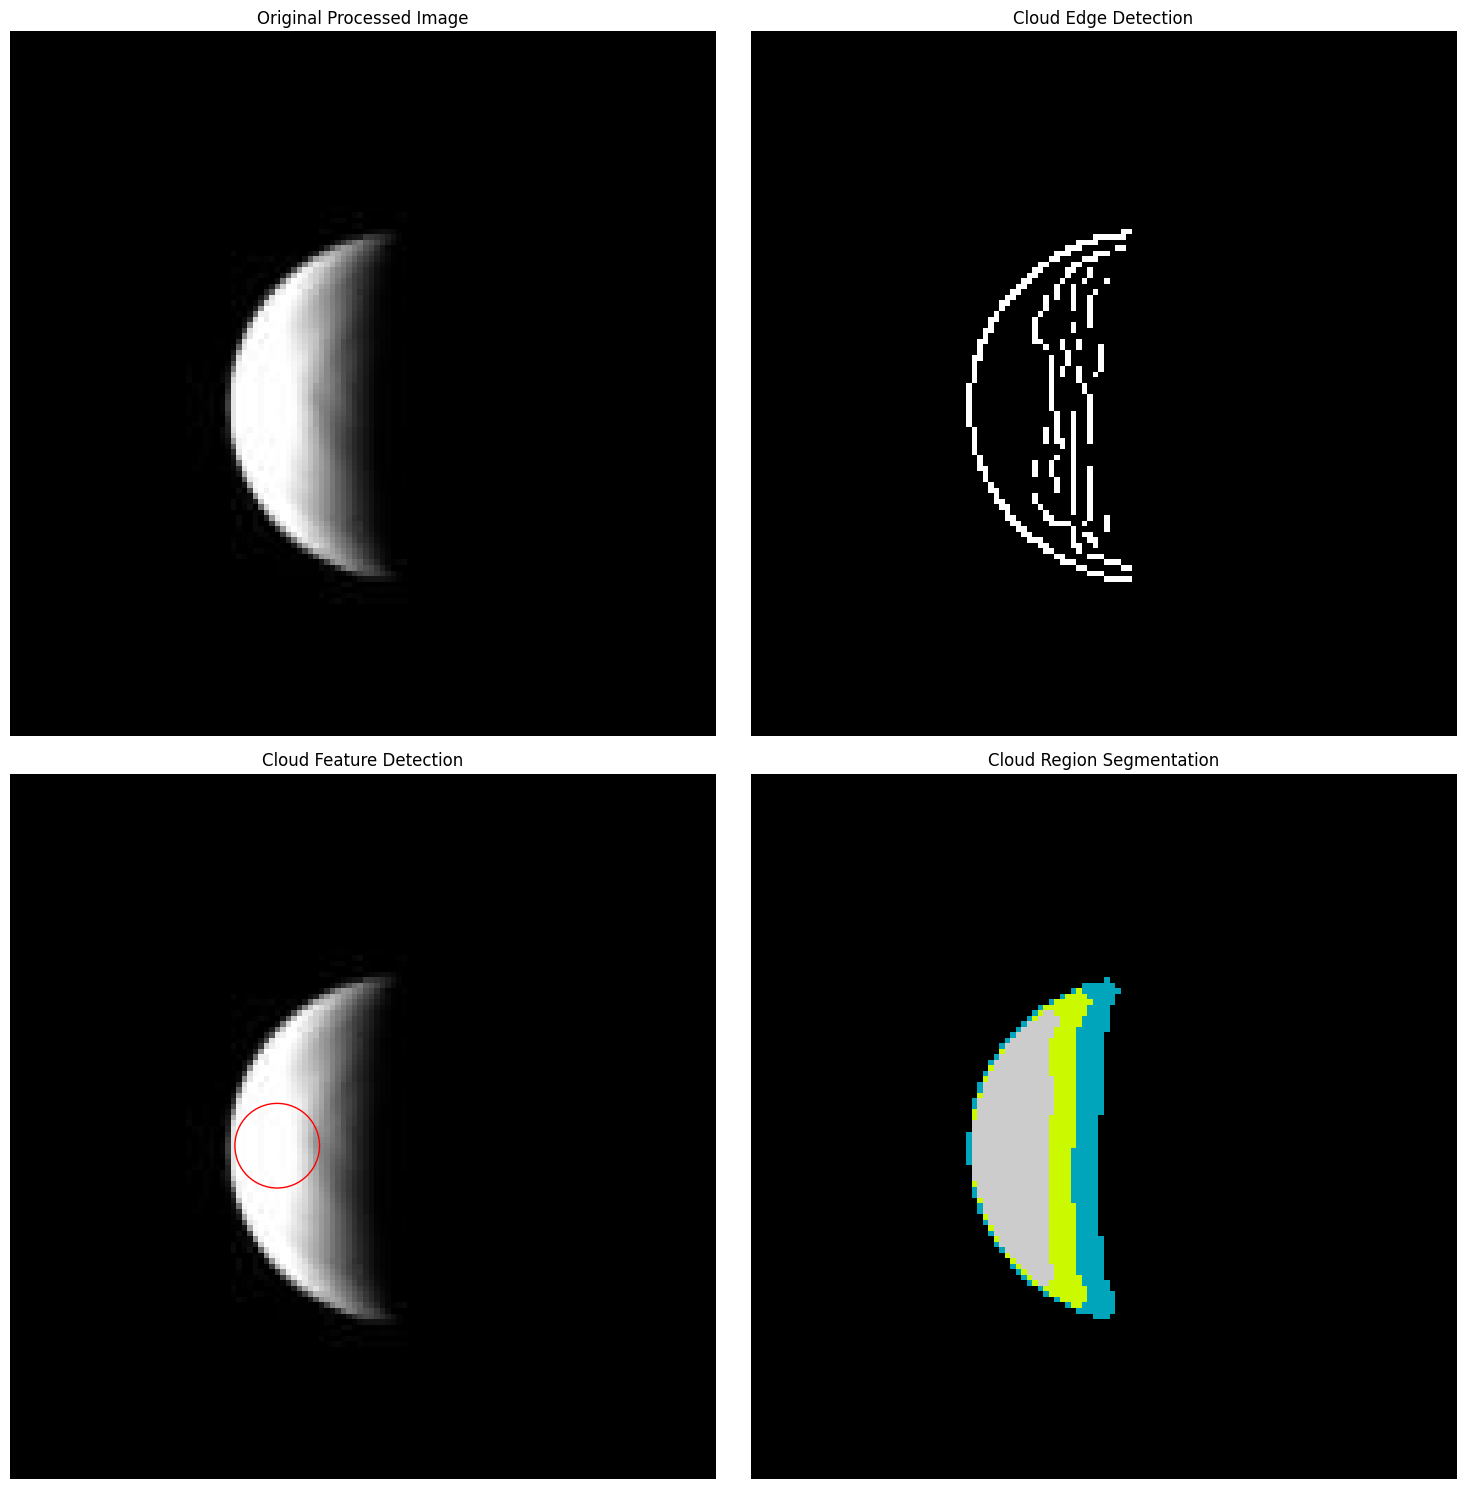

In [1]:
from vmc_feature_detector import VMCFeatureDetector

# Initialize detector
detector = VMCFeatureDetector("/Users/n_welikala/cvprojects/venus/data/vmc/processed/uv2")

# Analyze an image
results = detector.analyze_image('0550', 0)